## ID and anisotropy for different architectures and data categories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import json
import setup
import os

plt.style.use("ggplot")

In [2]:
def load_json_from_file(file_path):
    try:
        # Open the file and load the JSON content
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON in file: {file_path}")

In [13]:
cwd = os.getcwd()
# Find the root by resolving the part before "/scripts":
parts = cwd.split('/src')
root = parts[0]

file_path = root + "/data/results/embeddings_topology_experiment/_settings.json"
print(file_path)
settings = load_json_from_file(file_path)

settings

/Users/tonyg/Documents/_PHD_RESEARCH/_Anisotropy/Src/visual_encoders/data/results/embeddings_topology_experiment/_settings.json


{'architectures': ['alexnet',
  'resnet50',
  'facebook/convnext-tiny-224',
  'facebook/convnext-base-224',
  'openai/clip-vit-base-patch16',
  'microsoft/beit-base-patch16-224',
  'microsoft/beit-base-patch16-224-pt22k-ft22k'],
 'image_categories': ['SHIHTZU', 'BUTTERFLY', 'MIX'],
 'num_samples': 300,
 'BS': 16,
 'num_resamplings': 10,
 'pretrained': True,
 'portion_to_sample': 0.9,
 'timestamp': '2024-09-24 23:03:37',
 'note': 'Compare topological characteristics for mixed and dedicated image category for all architectures.'}

alexnet
['input', 'MaxPool2d', 'MaxPool2d', 'MaxPool2d', 'Linear', 'Linear', 'Linear']
[0, 2, 4, 8, 10, 12, 13]


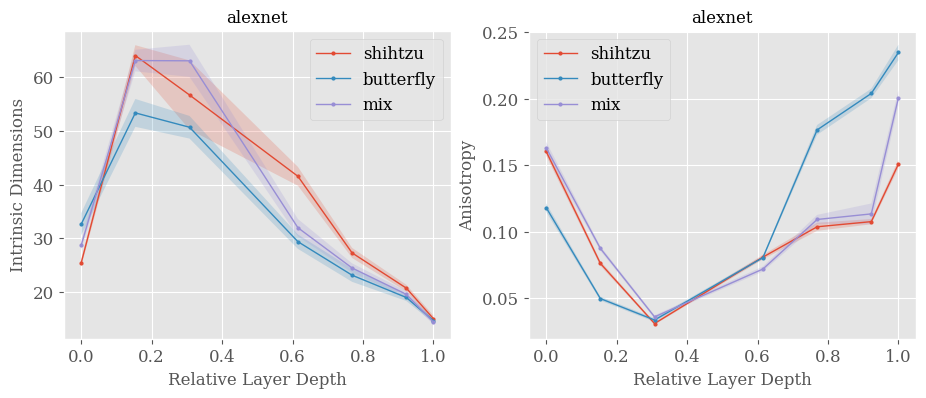

resnet50
['input', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']
[0, 1, 10, 22, 40, 49, 50, 51]


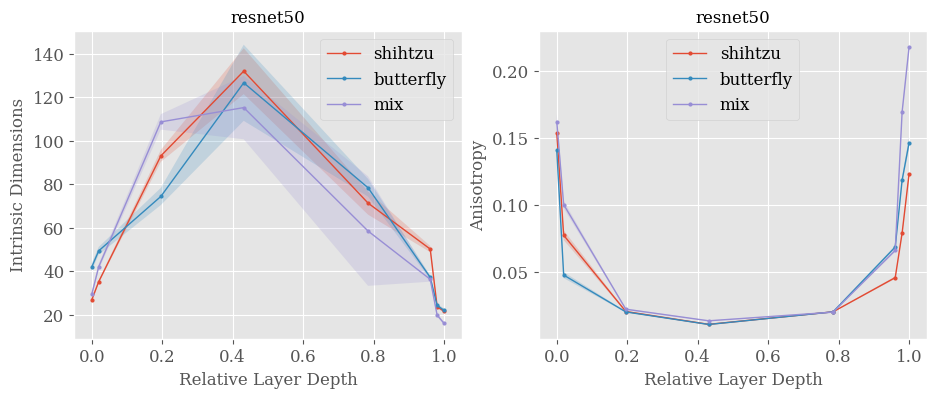

facebook/convnext-tiny-224
['input', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


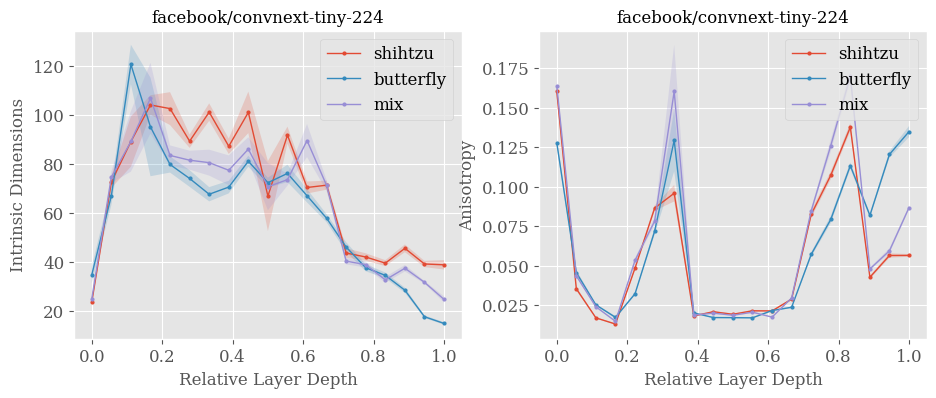

facebook/convnext-base-224
['input', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer', 'ConvNextLayer']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


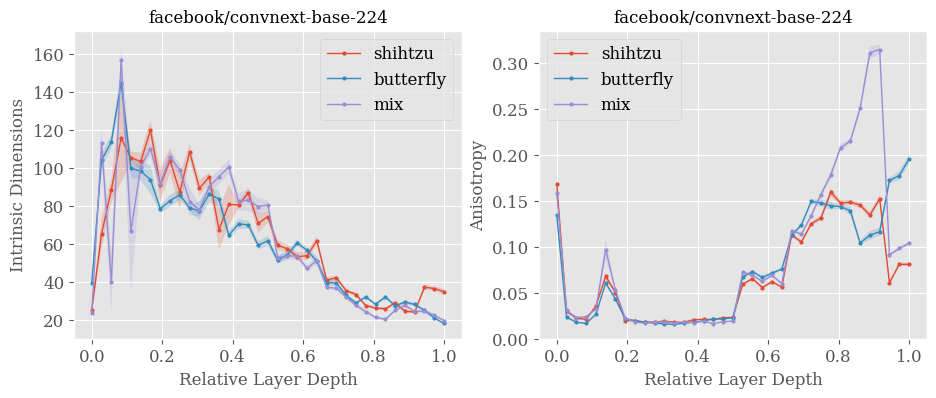

openai/clip-vit-base-patch16
['input', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer', 'CLIPEncoderLayer']
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


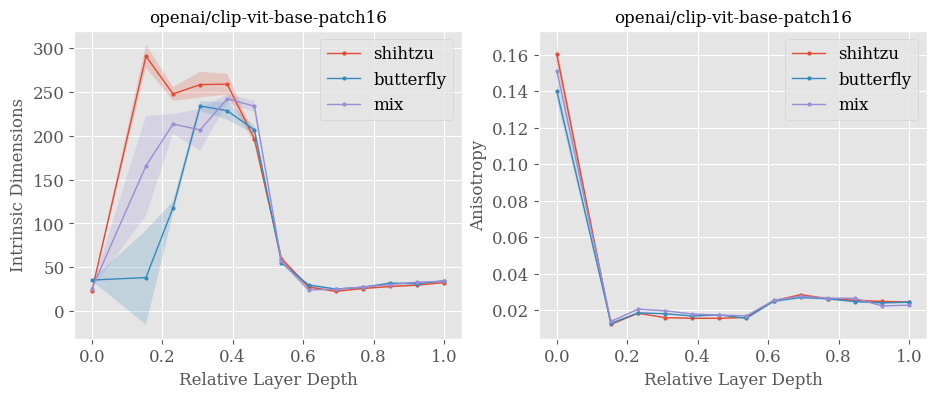

microsoft/beit-base-patch16-224
['input', 'BeitEmbeddings', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


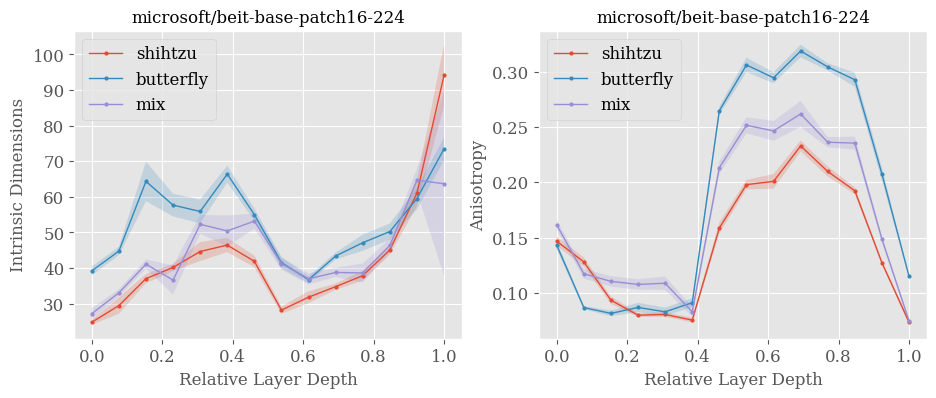

microsoft/beit-base-patch16-224-pt22k-ft22k
['input', 'BeitEmbeddings', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer', 'BeitLayer']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


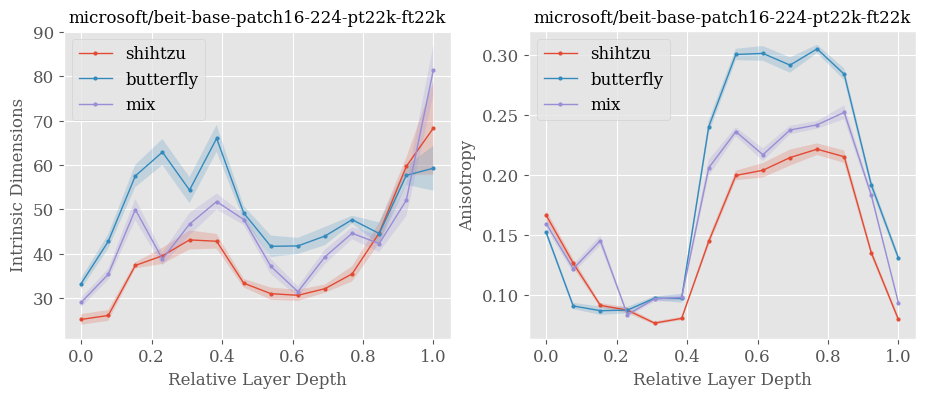

In [15]:
linewidth = 1
markersize = 2
plt.rcParams['font.family'] = "serif" 
plt.rcParams.update({
    'font.size': 12,  # Base font size
    'axes.titlesize': 12,  # Title font size
    'axes.labelsize': 12,  # X and Y label font size
    'xtick.labelsize': 12,  # X tick labels font size
    'ytick.labelsize': 12,  # Y tick labels font size
    'legend.fontsize': 12   # Legend font size
})

for i, arch_name in enumerate(settings["architectures"]):
    fig, axs = plt.subplots(1, 2, figsize=(11, 4))

    arch = arch_name.replace("/", "-")
    path = root + "/data/results/embeddings_topology_experiment/" + arch + "_embeddings_topology.json"
    arch_data = load_json_from_file(path)
    print(arch_name)
    print(arch_data["layers_names"])
    print(arch_data["layers_depths"])

    # Extract data for categories
    categories = settings["image_categories"]
    layer_depths = np.array(arch_data["layers_depths"])
    layer_depths_relative = layer_depths/layer_depths[-1]

    for cat in categories:
        # Intrinsic Dimensions plot with error bars
        ids = np.array(arch_data["intrindic_dims"][cat])
        ids_errs = np.array(arch_data["intrindic_dims_errors"][cat])
        ids_upper_bound = ids + ids_errs
        ids_lower_bound = ids - ids_errs

        # axs[0].errorbar(layer_depths_relative, ids, yerr=ids_errs, 
        #                 fmt=' ', capsize=4, alpha=0.4)
        axs[0].fill_between(layer_depths_relative, ids_lower_bound, ids_upper_bound, 
                            alpha=.2, linewidth=0)
        axs[0].plot(layer_depths_relative, ids, 
                    'o-', markersize=markersize, linewidth=linewidth, label=cat.lower())
        
        # if cat == "MIX":
        #     for i, (x, y)  in enumerate(zip(layer_depths_relative, ids)):
        #         axs[0].annotate("(" + str(arch_data["layers_depths"][i]) + ")",
        #             xy=(x - 0.03, 15), xytext=(x - 0.02, 14),
        #             horizontalalignment='left', verticalalignment='top',
        #             fontsize=9, alpha=0.9)
            
        axs[0].set_title(f'{arch_name}')
        axs[0].set_xlabel('Relative Layer Depth')
        axs[0].set_ylabel('Intrinsic Dimensions')
        axs[0].legend()
        axs[0].grid(True)

        # Anisotropy plot with error bars
        a = np.array(arch_data["anisotropies"][cat])
        a_errs = np.array(arch_data["anisotropies_errors"][cat])
        a_upper_bound = a + a_errs
        a_lower_bound = a - a_errs
        # axs[1].errorbar(layer_depths_relative, a, yerr = a_errs, 
        #                 fmt = ' ', capsize=4, alpha=0.5)
        axs[1].fill_between(layer_depths_relative, a_lower_bound, a_upper_bound, 
                            alpha=.2, linewidth=0)
        axs[1].plot(layer_depths_relative, a, 
                    'o-', markersize=markersize, linewidth=linewidth, label=cat.lower())

        axs[1].set_title(f"{arch_name}")
        axs[1].set_xlabel("Relative Layer Depth")
        axs[1].set_ylabel("Anisotropy")
        axs[1].legend()
        axs[1].grid(True)

    # plt.tight_layout()
    path = root + "/reports/figures/" + arch + "_topology.png"
    fig.savefig(path, format="png", dpi=300, bbox_inches='tight')

    path = root + "/data/results/embeddings_topology_experiment/" + arch + "_topology.png"
    fig.savefig(path, format="png", dpi=300, bbox_inches='tight')

    plt.show()